In [1]:
from caveclient import CAVEclient
import nglui
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# this is the datastack name of the public release
# passing it will auto-configure many of the services
client = CAVEclient('minnie65_public_v117')

In [3]:
client.materialize.get_tables()

['nucleus_detection_v0',
 'synapses_pni_2',
 'nucleus_neuron_svm',
 'proofreading_status_public_release',
 'func_unit_em_match_release',
 'allen_soma_ei_class_model_v1',
 'allen_visp_column_soma_coarse_types_v1',
 'allen_soma_coarse_cell_class_model_v1']

In [4]:
# this shows you the basic information about this datastack within CAVE
client.info.get_datastack_info()

{'aligned_volume': {'id': 1,
  'name': 'minnie65_phase3',
  'display_name': 'Minnie65',
  'description': "This is the second alignment of the IARPA 'minnie65' dataset, completed in the spring of 2020 that used the seamless approach.",
  'image_source': 'precomputed://https://bossdb-open-data.s3.amazonaws.com/iarpa_microns/minnie/minnie65/em'},
 'segmentation_source': 'graphene://https://minnie.microns-daf.com/segmentation/table/minnie65_public_v117',
 'skeleton_source': None,
 'analysis_database': None,
 'viewer_site': 'https://neuromancer-seung-import.appspot.com/',
 'synapse_table': 'synapses_pni_2',
 'soma_table': 'nucleus_neuron_svm',
 'local_server': 'https://minnie.microns-daf.com',
 'description': 'The publicly available version of the minnie65 volume.',
 'viewer_resolution_x': 4.0,
 'viewer_resolution_y': 4.0,
 'viewer_resolution_z': 40.0,
 'proofreading_status_table': None,
 'cell_identification_table': None,
 'proofreading_review_table': None}

In [5]:
# pick a segment you selected from neuroglancer to enter here
seg_id = 864691135474648896

In [6]:
# lets get the outputs of this cell
output_df = client.materialize.synapse_query(pre_ids=seg_id)
# and the inputs
input_df = client.materialize.synapse_query(post_ids=seg_id)


In [7]:
# here are the number of output synapses and input synapses
len(output_df), len(input_df)

(232, 1554)

In [8]:
# take peak at the output synapse dataframe
output_df.head()

,id,valid,pre_pt_supervoxel_id,pre_pt_root_id,post_pt_supervoxel_id,post_pt_root_id,size,pre_pt_position,post_pt_position,ctr_pt_position
0,342361353,t,103680030495990215,864691135474648896,103680030496002328,864691134947465724,456,"[282724, 261022, 22820]","[282732, 260974, 22834]","[282698, 261034, 22826]"
1,346621273,t,104239887938858534,864691135474648896,104239887938855726,864691135952035875,360,"[286810, 238068, 21802]","[286892, 237968, 21804]","[286862, 237990, 21798]"
2,368367952,t,105788756761877367,864691135474648896,105788756761876187,864691135307118406,10624,"[298378, 243810, 25925]","[298388, 243778, 25927]","[298372, 243784, 25924]"
3,381765166,t,107337074419646813,864691135474648896,107337074419638329,864691136536564642,10504,"[309408, 244972, 19151]","[309456, 245044, 19136]","[309474, 245061, 19140]"
5,324562691,t,102693493620865226,864691135474648896,102693493620852318,864691136908297582,28416,"[275832, 250790, 22228]","[275894, 250834, 22218]","[275864, 250820, 22226]"


<h3> Synapse Table Descriptions</h3>
Here's a breakdown of what each of those columns mean.
</div>

<table style={float:left}>
    <tr>
        <td><h4>column</h4></td>
        <td><h4>description</h4></td>
    </tr> 
    <tr>
        <td>id</td>
        <td>The ID that is specific to this synapse, it corresponds to the ID in the synapse cleft segmentation</td>
    </tr>
    <tr>
        <td>pre_pt_position</td>
        <td>a point that is in the pre-synaptic terminal of this synapse (in 4,4,40 voxels) </td>
    </tr>
    <tr>
        <td>pre_pt_supervoxel_id</td>
        <td>the ID in the watershed layer this pre-synaptic point lies in, a bookkeeping column for the presynaptic side </td>
    </tr>
    <tr>
        <td>pre_pt_root_id</td>
        <td>the ID of the segment on the presynaptic side</td>
    </tr>
     <tr>
        <td>ctr_pt_position</td>
        <td>a point that is on the center of the synapse (in voxels)</td>
    </tr>
    <tr>
        <td>post_pt_position</td>
        <td>Same as pre_pt but for the post synaptic side.</td>
    </tr>
    <tr>
        <td>post_pt_supervoxel_id</td>
        <td>Same bookkeeping column as pre_pt but for the post synaptic side.</td>
    </tr>
    <tr>
        <td>post_pt_root_id</td>
        <td>Same as pre_pt but for the post synaptic side</td>
    </tr>
    <tr>
        <td>size</td>
        <td>The volume of the segmented synaptic cleft in units of 4,4,40 voxels.</td>
    </tr>
</table>

Each row in this table is a single synapse. You should see that the value in the pre_pt_root_id column is the same for all, and equals the id you selected above. 
<h5>Note again that position columns are in voxel coordinates, just like Neuroglancer displays in the upper left corner. The units of this resolution are stored in metadata for each table, but  the tables are generally stored at  4x4x40 nm resolution for this dataset.</h5>

In [9]:
# synapses however are just one example of annotation tables on the dataset
# there are more tables available, you can list them using this method
client.materialize.get_tables()

['nucleus_detection_v0',
 'synapses_pni_2',
 'nucleus_neuron_svm',
 'proofreading_status_public_release',
 'func_unit_em_match_release',
 'allen_soma_ei_class_model_v1',
 'allen_visp_column_soma_coarse_types_v1',
 'allen_soma_coarse_cell_class_model_v1']

In [10]:
# synapses_pni_2 is the synapse table (see the info metadata above)
# you can access the metadata of the synapse table here
client.materialize.get_table_metadata('synapses_pni_2')

{'aligned_volume': 'minnie65_phase3',
 'valid': True,
 'created': '2020-11-04T06:48:36.953637',
 'table_name': 'synapses_pni_2',
 'schema': 'synapse',
 'id': 973,
 'schema_type': 'synapse',
 'user_id': '304',
 'description': 'Automated synapse detection performed by Nick Turner from the Seung Lab.  size represents the number of (4x4x40 nm) voxels painted by the automated cleft segmentation, and the IDs reference the IDs of the cleft segmentation.  Ctr_pt reflects the centroid of the cleft segmentation. The cleft segmentation volume is located in the flat_segmentation_source field. ',
 'notice_text': None,
 'reference_table': None,
 'flat_segmentation_source': 'precomputed://s3://bossdb-open-data/iarpa_microns/minnie/minnie65/clefts-sharded/',
 'write_permission': 'PRIVATE',
 'read_permission': 'PUBLIC',
 'last_modified': '2022-10-25T19:24:28.559914',
 'segmentation_source': '',
 'pcg_table_name': 'minnie3_v1',
 'last_updated': '2024-09-14T10:10:01.195692',
 'voxel_resolution': [4.0, 4.

In [11]:
# another useful table is the nucleus_neuron_svm table
# that contains the list of all nucleus detections and those that were classified as neurons
client.materialize.get_table_metadata('nucleus_neuron_svm')

{'id': 974,
 'valid': True,
 'schema': 'cell_type_local',
 'aligned_volume': 'minnie65_phase3',
 'table_name': 'nucleus_neuron_svm',
 'created': '2020-11-13T18:35:29.959876',
 'schema_type': 'cell_type_local',
 'user_id': '121',
 'description': 'This table contains a prediction about what nucleus detections are neurons and which are likely not neurons.  This is based upon a model trained by Leila Elabbady (Allen Institute) on nucleus segmentations in Basil, processed for features such as volume, foldedness, location in cortex, etc, and applied to Minnie65.  In Basil the model had a cross validated f1 score of .97 and a recall of .97 for neurons.  Manual validation performed on a column of 1316 nuclei in Minnie65 measured a recall of .996 and a precision of .969. ',
 'notice_text': 'Please cite https://doi.org/10.1101/2022.07.20.499976 when using this table.',
 'reference_table': None,
 'flat_segmentation_source': 'precomputed://https://bossdb-open-data.s3.amazonaws.com/iarpa_microns/mi

In [12]:
# here you can see how many entries are in a table
client.materialize.get_annotation_count('nucleus_neuron_svm')

171815

In [13]:
# this is small enough that simply downloading the entire thing
# is reasonable
nuc_df = client.materialize.query_table('nucleus_neuron_svm')
nuc_df.head()

,id,valid,classification_system,cell_type,pt_supervoxel_id,pt_root_id,pt_position
0,348209,t,is_neuron,not-neuron,92423916840203243,864691134945836023,"[200928, 282512, 16717]"
1,640071,t,is_neuron,not-neuron,0,0,"[371696, 98672, 19791]"
2,462557,t,is_neuron,not-neuron,101417167182010351,864691135294515893,"[266304, 178832, 25200]"
3,266849,t,is_neuron,not-neuron,88330641678196634,864691135974582895,"[171184, 194128, 20082]"
4,219514,t,is_neuron,not-neuron,85994867133853165,864691135644554735,"[154480, 92528, 23737]"


<h2>Column descriptions</h2>
<table style={float:left} width="75%">
    <tr><td><h4>column</h4></td>
        <td><h4>description</h4></td>
    </tr>
       <tr><td>id</td>
           <td>corresponds to the ID from the nucleus detection and segmentation</td>
    </tr>
           <tr><td>valid</td>
           <td>internal check, uniformly ‘t’</td>
    </tr>
               <tr><td>classification_system</td>
           <td>uniformly “is_neuron” for all entries.</td>
    </tr>
                  <tr><td>cell_type</td>
           <td>‘neuron’ if the classifier called this a neuron,‘not-neuron’ if it was not classified as a neuron  this contains both non-neuronal cells as well as false positive detections.</td>
    </tr>
                  <tr><td>pt_supervoxel_id</td>
           <td>the ID of the supervoxel from the watershed segmentation that is under the pt_position</td>
    </tr>
                  <tr><td>pt_root_id</td>
           <td>the ID of the segment/root_id under the pt_position from the Proofread Segmentation (v117).</td>
    </tr>
                  <tr><td>pt_position</td>
           <td>the location in 4,4,40 nm voxels of the nucleus location</td>
    </tr>
</table>


In [15]:
# you might notice that the 1st row had 
# an entry for pt_root_id = 0, which means that this nucleus was outside the segmented volume
# we can filter out those detections in the query_table
# using the filter options in query table
client.materialize.query_table

<bound method MaterializationClientV2.query_table of <caveclient.materializationengine.MaterializationClientV3 object at 0x103f45850>>

In [16]:
# let's filter out ID=0
# and filter in only neurons
nuc_df = client.materialize.query_table('nucleus_neuron_svm',
                                        filter_equal_dict={'cell_type':'neuron'},
                                        filter_out_dict={'pt_root_id':[0]})
nuc_df.head()

,id,valid,classification_system,cell_type,pt_supervoxel_id,pt_root_id,pt_position
0,485509,t,is_neuron,neuron,103588564537113366,864691136740606812,"[282608, 103808, 20318]"
1,113721,t,is_neuron,neuron,79951332685465031,864691135366988025,"[110208, 153664, 23546]"
2,263203,t,is_neuron,neuron,87694643458256575,864691135181741826,"[166512, 174176, 24523]"
3,456177,t,is_neuron,neuron,102677963354799688,864691135337690598,"[275616, 135120, 24873]"
4,364447,t,is_neuron,neuron,94449079618306553,864691136883828334,"[216064, 166800, 15025]"


In [17]:
# how many do we have?
nuc_df.shape

(89062, 7)

In [18]:
# but maybe we are interested in neurons which have been proofread and have lots
# of outputs... we can get that information from this table
client.materialize.get_table_metadata('proofreading_status_public_release')

{'valid': True,
 'id': 995,
 'aligned_volume': 'minnie65_phase3',
 'schema': 'compartment_proofread_status',
 'created': '2021-06-28T23:51:29.394068',
 'table_name': 'proofreading_status_public_release',
 'schema_type': 'compartment_proofread_status',
 'user_id': '121',
 'description': "The proofreading status of neurons that have been comprehensively proofread within this version. Axon and dendrite compartment status are marked separately under 'axon_status' and 'dendrite_status', as proofreading effort was applied differently to the different compartments in some cells. There are three possible status values for each compartment: 'non' indicates no comprehensive proofreading. 'clean' indicates that all false merges have been removed, but all tips have not necessarily been followed. 'extended' indicates that the cell is both clean and all tips have been followed as far as a proofreader was able to. The 'pt_position' is at a cell body or similar core position for the cell. The column '

In [19]:
# how many proofread neurons are there?
client.materialize.get_annotation_count('proofreading_status_public_release')

601

In [20]:
# so lets pick out the ones with extended axons
prf_df=client.materialize.query_table('proofreading_status_public_release', 
                                      filter_equal_dict={'status_axon':'extended'})


In [21]:
prf_df.head()

,id,valid,pt_supervoxel_id,pt_root_id,valid_id,status_dendrite,status_axon,pt_position
0,346,t,89660913577302088,864691136194248918,864691136194248918,extended,extended,"[181147, 143788, 22167]"
1,347,t,89941288908184714,864691135517422218,864691135517422218,extended,extended,"[182993, 135610, 21130]"
2,348,t,85369450370657325,864691135753932237,864691135753932237,extended,extended,"[149711, 151738, 17565]"
3,349,t,92129866602123648,864691135367058169,864691135367058169,extended,extended,"[198949, 188854, 19772]"
4,350,t,88815663879226337,864691135293126156,864691135293126156,extended,extended,"[174921, 137614, 21123]"


In [22]:
# how many of these
prf_df.shape

(78, 8)

In [23]:
# lets pull all the synapses from these.
# There is a practical upper bound of 200K synapses that can be queried in one go
# and it can be faster to execute many smaller queries in parallel
# but for code simplicity and to demonstrate filtering, lets do it in one query here.
syn_df = client.materialize.query_table('synapses_pni_2',
                                        filter_in_dict={'pre_pt_root_id': prf_df.pt_root_id.values})

In [24]:
# how many did we find?
syn_df.shape

(56905, 10)

Text(0, 0.5, 'number of cells')

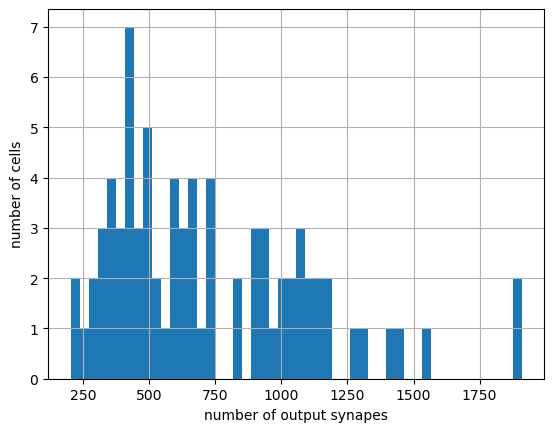

In [25]:
# lets group them by pre_id to get a histogram of synapses out
syn_df.groupby('pre_pt_root_id').valid.count().hist(bins=50)
plt.xlabel('number of output synapes')
plt.ylabel('number of cells')

Text(0, 0.5, 'number of connections')

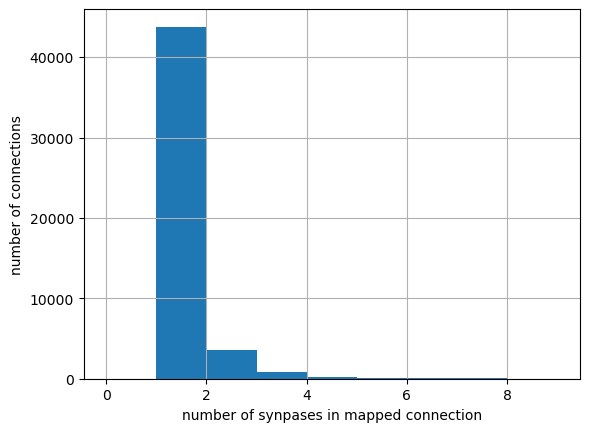

In [26]:
# now lets reduce it to connections by grouping by pre and post
# and get a histogram of synapses per connection
syn_df.groupby(['pre_pt_root_id', 'post_pt_root_id']).valid.count().hist(bins=np.arange(0,10))
plt.xlabel('number of synpases in mapped connection')
plt.ylabel('number of connections')

many of these connections are not onto cells with cell bodies
due to disconnected spine heads and orphan dendrites
and some are onto cells with more than one soma that need to be split
to sort those out, we need to figure out how many nuclei are
in each cell, and then merge that information.

In [27]:
num_soma = nuc_df.groupby('pt_root_id').valid.count()
num_soma.name = 'num_soma'

Text(0, 0.5, 'number of objects')

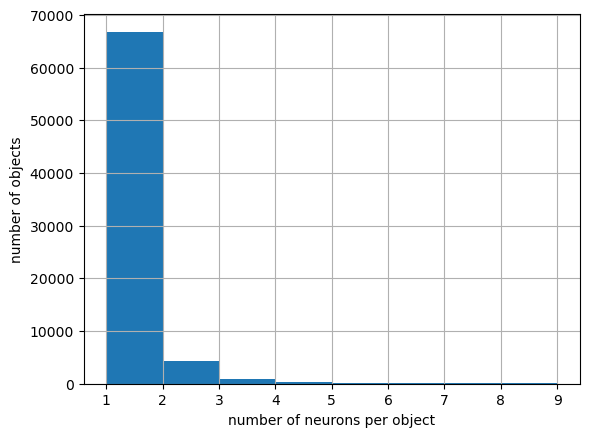

In [28]:
# now we can look at this distribution.. most neurons ~75% have only one neuronal nucleus in them
num_soma.hist(bins=np.arange(1,10,1))
plt.xlabel('number of neurons per object')
plt.ylabel('number of objects')

In [29]:
syn_m_df=pd.merge(syn_df, num_soma, left_on='post_pt_root_id', right_index=True, how='left')

In [30]:
# now the num_soma column tells us how many soma are associated with each synapse
# where NaN = 0 soma
syn_m_df.head()

,id,valid,pre_pt_supervoxel_id,pre_pt_root_id,post_pt_supervoxel_id,post_pt_root_id,size,pre_pt_position,post_pt_position,ctr_pt_position,num_soma
0,392990786,t,108313646635037887,864691136903144370,108313646635031324,864691133490688863,2168,"[316546, 181240, 16976]","[316496, 181222, 16976]","[316518, 181242, 16976]",NaN
1,367491011,t,105919942108940243,864691134884807418,105919942108953181,864691136902999474,204,"[299484, 172656, 25069]","[299510, 172600, 25076]","[299538, 172674, 25072]",NaN
2,203270208,t,92409555207889486,864691136011067043,92409555207885060,864691135348496087,2756,"[200798, 175720, 22249]","[200806, 175740, 22236]","[200775, 175755, 22246]",1.0
3,402091147,t,109018021808508698,864691136309871706,109018021808492130,864691136003665354,3540,"[321836, 186342, 21141]","[321794, 186330, 21135]","[321778, 186336, 21135]",1.0
4,142870139,t,88039065475428861,864691136209328060,88039065475431637,864691135888567689,2452,"[169414, 118904, 24336]","[169342, 118874, 24338]","[169380, 118910, 24338]",1.0


In [31]:
# lets fill those with 0s
syn_m_df.num_soma.fillna(0.0, inplace=True)

/var/folders/7m/9kbwk4911v71n2n88dmjq4cc0000gn/T/ipykernel_24271/1217603953.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  syn_m_df.num_soma.fillna(0.0, inplace=True)


In [32]:
# now grouping across connections, how many zero, single, and more than 1 connection do we have

<Axes: >

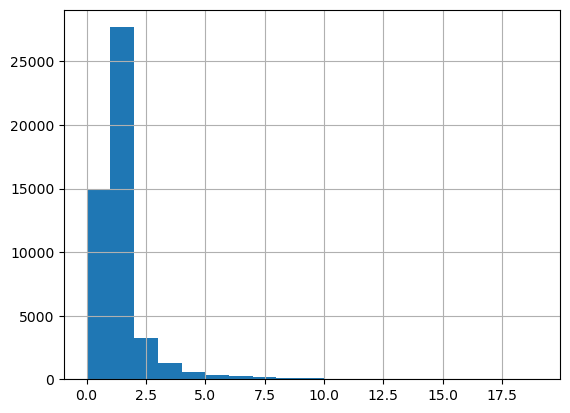

In [33]:
# num soma is the same for each synapse in a connection, 
# so we just take the first synapse of each connection to get at this
conn_df = syn_m_df.groupby(['pre_pt_root_id', 'post_pt_root_id']).num_soma.first()
n_conn = len(conn_df)
syn_m_df.groupby(['pre_pt_root_id', 'post_pt_root_id']).num_soma.first().hist(bins=np.arange(0,20))

In [34]:
# lets see what fraction have 1 soma
(conn_df.value_counts()/n_conn)[1.0]

0.5681071985553641

In [35]:
# lets see what fracton have 0 soma
# disconnected spine heads and orphan dendrites
(conn_df.value_counts()/n_conn)[0.0]

0.3056923582040548

In [36]:
# and so how many connections map to a single soma?
conn_df.value_counts()[1.0]

27685